<a href="https://colab.research.google.com/github/Christina-Joseph/CE888-7-SP-Data-Science-and-Decision-Making/blob/main/EndtoEndModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.compose import ColumnTransformer
from time import perf_counter

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score






In [42]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/ce888/master/lab3/bank-additional-full.csv", delimiter=";")
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [44]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


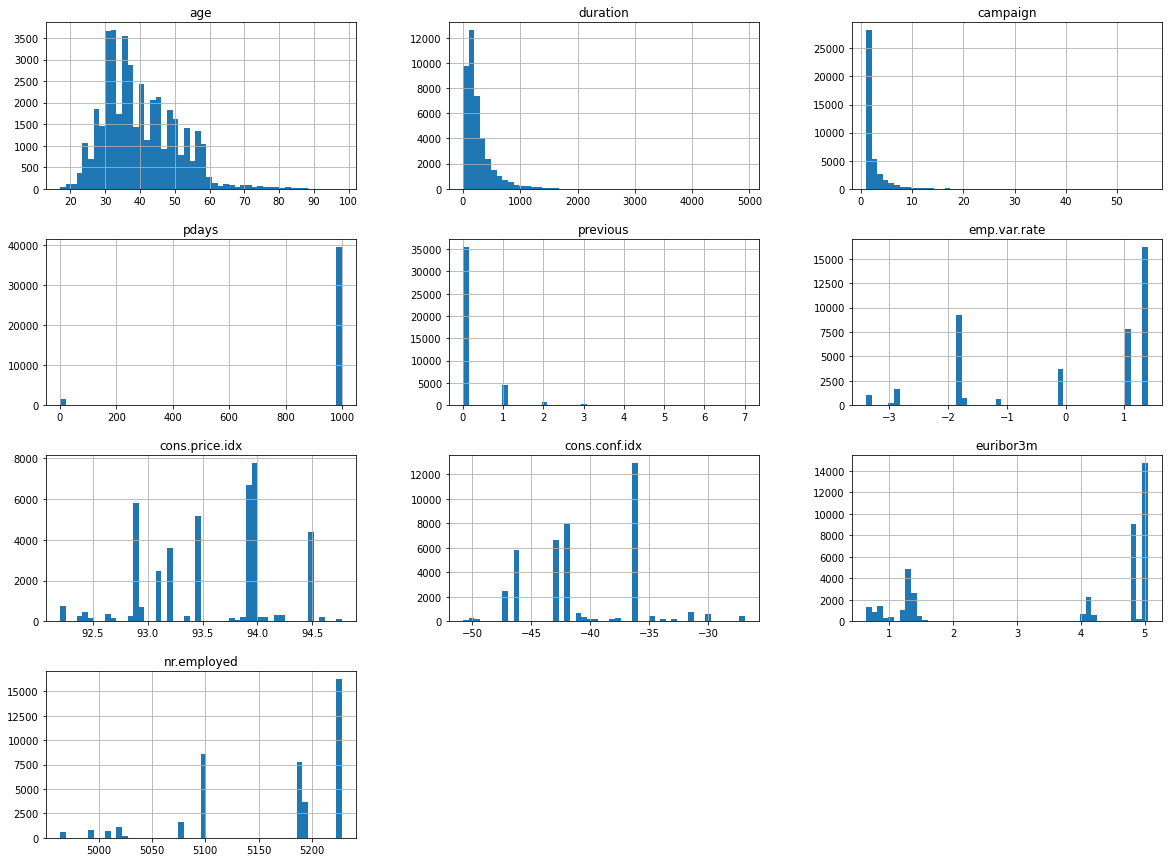

In [45]:
tmp = df.hist(bins=50, figsize=(20,15))

In [46]:
le = LabelEncoder()
df["y"] = le.fit_transform(df["y"])
df_ohe = pd.get_dummies(df)
df_ohe.drop('duration', axis=1)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,...,0,0,1,0,0,0,0,0,1,0
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,...,0,0,1,0,0,0,0,0,1,0


In [47]:
df_ohe.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,...,0.017432,0.013839,0.190031,0.206711,0.209357,0.196416,0.197485,0.103234,0.863431,0.033335
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,...,0.130877,0.116824,0.392330,0.404951,0.406855,0.397292,0.398106,0.304268,0.343396,0.179512
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
# split catagory data to column
data = pd.get_dummies(df)
data

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0


In [49]:
print('Number of columns :', len(data.columns))

Number of columns : 64


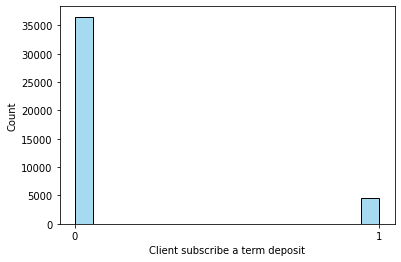

In [50]:
# plot histogram for output data
p = sns.histplot(data=data, x="y", color="skyblue")
p.set_xlabel("Client subscribe a term deposit")
p.set_xticks(range(0,2))

In [51]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [52]:
print('People who not subscribe a term deposit are',36548*100/(36548+4640),'% otherwise',4640*100/(36548+4640),'%')

People who not subscribe a term deposit are 88.73458288821988 % otherwise 11.26541711178013 %


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x = data.drop(labels='y', axis=1)
y = data['y']

In [55]:
# split data to training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50, stratify= y)

In [56]:
x, y = y_train.value_counts()
print('proportion of people who not subscribe a term deposit are %0.2f in training set' % (x/(x+y)))

proportion of people who not subscribe a term deposit are 0.89 in training set


In [57]:
x, y = y_test.value_counts()
print('proportion of people who not subscribe a term deposit are %0.2f in test set' % (x/(x+y)))

proportion of people who not subscribe a term deposit are 0.89 in test set


In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.dummy import DummyClassifier

In [59]:
def boost_random(clf,round,x_train,y_train):
  score = []
  for i in range(round):
    score.append(cross_val_score(clf, x_train, y_train, cv = 10, scoring='f1'))
  return np.mean(score), np.std(score)

In [60]:
# answer question in quiz
randomforest = RandomForestClassifier(n_estimators=100, max_depth=8)
mean, std = boost_random(randomforest,1,x_train,y_train)

print("randomforest f1 score: %0.2f +/- %0.3f" % (mean, std))

randomforest f1 score: 0.36 +/- 0.048


In [61]:
# answer question in quiz
randomforest = RandomForestClassifier(n_estimators=100, max_depth=6)
mean, std = boost_random(randomforest,1,x_train,y_train)

print("randomforest f1 score: %0.2f +/- %0.3f" % (mean, std))

randomforest f1 score: 0.31 +/- 0.047


In [62]:
from sklearn.metrics import f1_score

randomforest = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=60)
randomforest.fit(x_train,y_train)
y_pred = randomforest.predict(x_test)
score = f1_score(y_test,y_pred)
print("randomforest f1 score: %0.2f" % (score))

randomforest f1 score: 0.39


In [63]:
randomforest = RandomForestClassifier(n_estimators=100 , max_depth=10)
randomforest.fit(x_train,y_train)

RandomForestClassifier(max_depth=10)

In [64]:
import pickle as pkl

outp = open('model.pkl', 'wb')
pkl.dump(randomforest, outp, -1)  # where clf is your classifier
outp.close()

In [65]:
from google.colab import drive

testset = pd.concat([x_test, y_test], axis=1, join="inner")

# drive.mount('/content/drive')
# path = '/content/drive/My Drive/testset.csv'

# with open(path, 'w', encoding = 'utf-8-sig') as f:
#   testset.to_csv(f)

#testset.to_csv(index=False)
testset.to_csv('testset.csv', encoding = 'utf-8-sig')

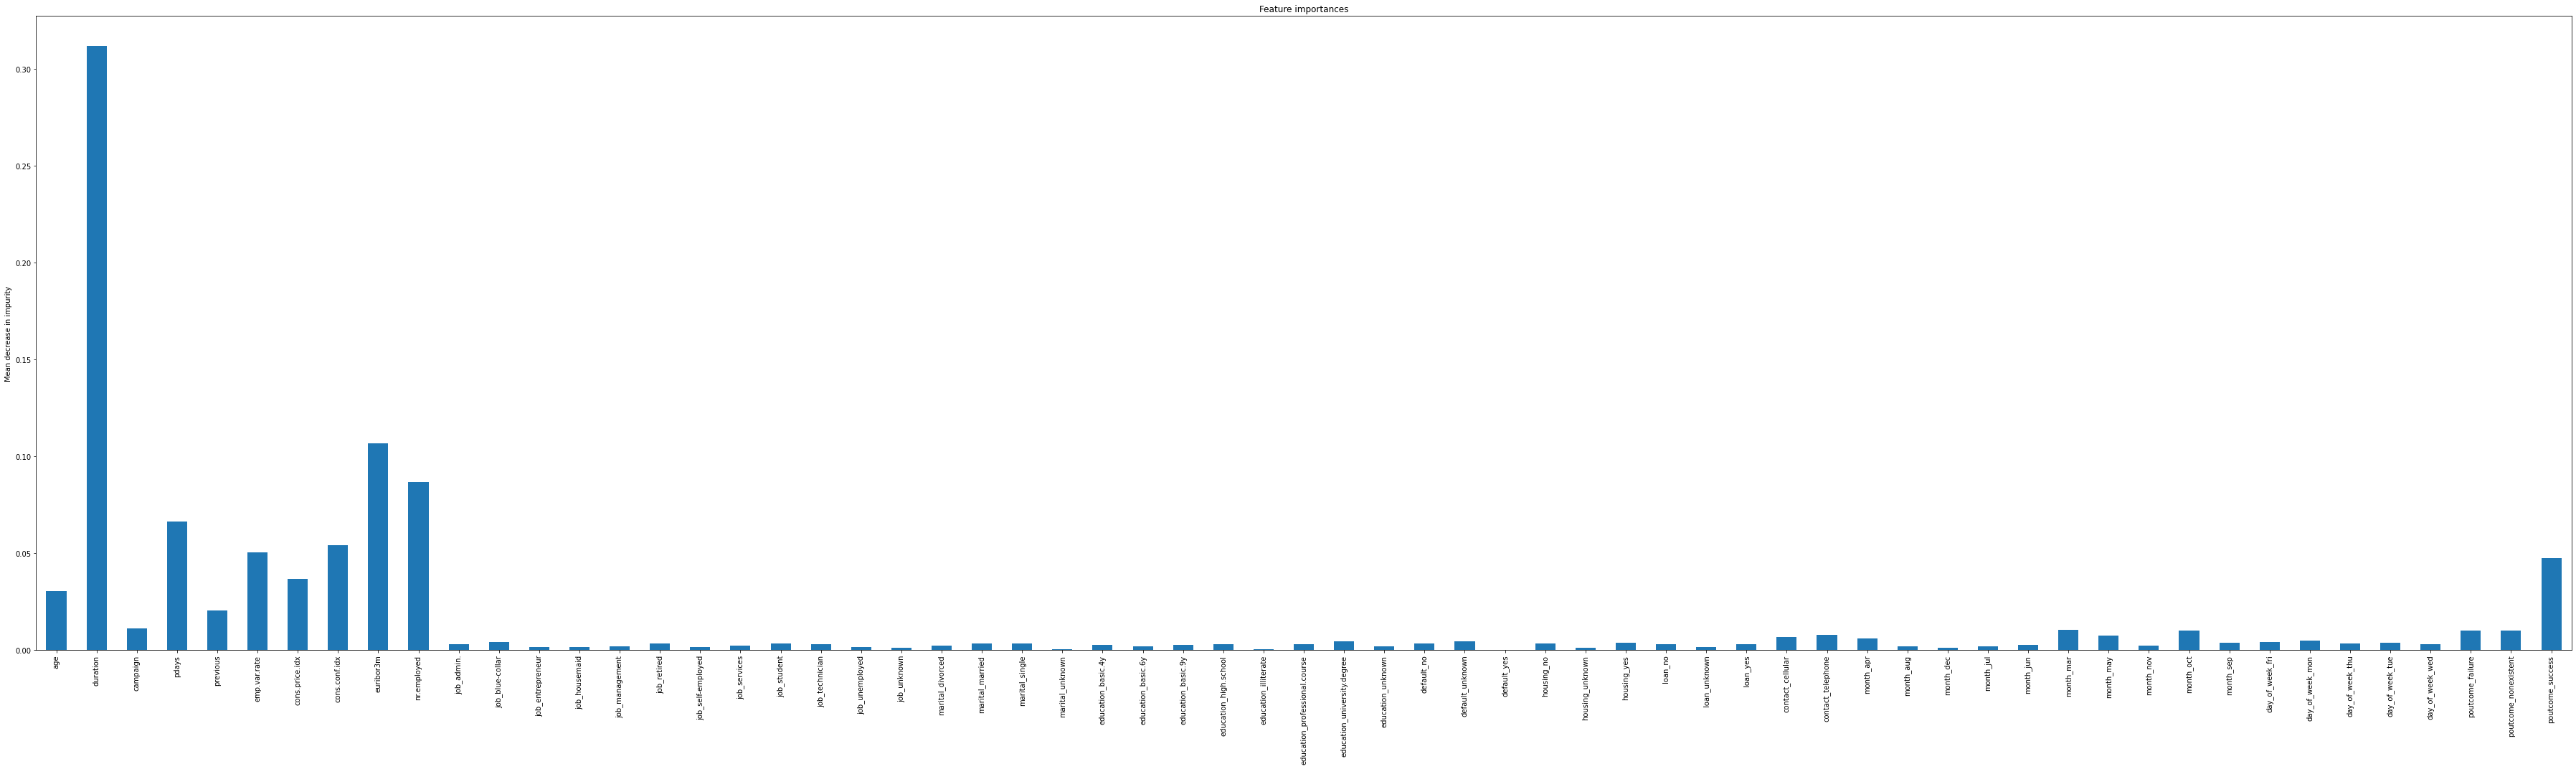

In [66]:
feature_name = x_train.columns
importances = randomforest.feature_importances_
forest_importances = pd.Series(importances, index=feature_name)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.set_figheight(15)
fig.set_figwidth(50)
fig.tight_layout()

In [67]:
dummy_clf = DummyClassifier(strategy='stratified')
dummy_scores = cross_val_score(dummy_clf, x_train, y_train, cv=10, scoring = 'f1')
print("dummy f1 score: %0.4f +/- %0.4f" % (dummy_scores.mean(), dummy_scores.std()))

dummy f1 score: 0.1128 +/- 0.0139


In [68]:
from sklearn.metrics import f1_score
randomforest = RandomForestClassifier(n_estimators=1000, max_depth=8)
randomforest.fit(x_train,y_train)
y_pre = randomforest.predict(x_test)
print('f1 score:',f1_score(y_test,y_pre))

f1 score: 0.39745627980922105


In [69]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [70]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/ce888/master/lab3/bank-additional-full.csv", delimiter=";")
# Drop column duration
df = df.drop(labels='duration', axis=1)
label = LabelEncoder()
df['y'] = label.fit_transform(df['y'])
data = pd.get_dummies(df)
#x = data.drop(labels='y', axis=1)

In [71]:
column =	['age',	'campaign',	'pdays',	'previous',	'emp.var.rate',	'cons.price.idx',	'cons.conf.idx',	'euribor3m',	'nr.employed']
column2 =	['pdays','euribor3m',	'nr.employed']
#x = data[column]
x = data.drop(labels='y', axis=1)
y = data['y']

In [72]:
sm = SMOTE()
X_res, y_res = sm.fit_resample(x, y)

scaler = StandardScaler()
x_scaler = scaler.fit_transform(X_res)

In [73]:
pca = PCA(n_components=7)
X_res_n = pca.fit_transform(X_res)

In [74]:
x_train, x_test, y_train, y_test = train_test_split(X_res_n, y_res, test_size=0.2, random_state=50, stratify= y_res)

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

clf = RandomForestClassifier()
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
score = f1_score(y_test,y_pred)
print("randomforest f1 score: %0.2f" % (score))

randomforest f1 score: 0.89


In [76]:
import pickle as pkl

outp = open('model.pkl', 'wb')
pkl.dump(clf, outp, -1)  # where clf is your classifier
outp.close()

In [77]:
column = ['pca1','pca2','pca3','pca4','pca5','pca6','pca7',]
x_frame = pd.DataFrame(x_test, columns = column)
y_frame = pd.DataFrame(y_test, columns = ['y'])
testset = pd.concat([x_frame, y_frame], axis=1, join="inner")

testset.to_csv('testset.csv', encoding = 'utf-8-sig')